# Classification (2)

#### Import Library dan load Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv(r"D:\SEMESTER 4\IS411 Data Modelling\LAB\Bahan Modul 10\diabetes.csv", header=0)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Modelling

In [4]:
#split dataset in features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = dataset[feature_cols] #features
y = dataset['Outcome'] #Target variables

In [5]:
#split dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Menggunakan teknik pruning

#### Decision Tree biasa

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


[Text(0.40086206896551724, 0.9705882352941176, 'X[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.14906609195402298, 0.9117647058823529, 'X[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.04597701149425287, 0.8529411764705882, 'X[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.022988505747126436, 0.7941176470588235, 'X[0] <= 7.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.011494252873563218, 0.7352941176470589, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.034482758620689655, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06896551724137931, 0.7941176470588235, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.05747126436781609, 0.7352941176470589, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.08045977011494253, 0.7352941176470589, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06896551724137931, 0.6764705882352942, 'gini = 0.0\nsam

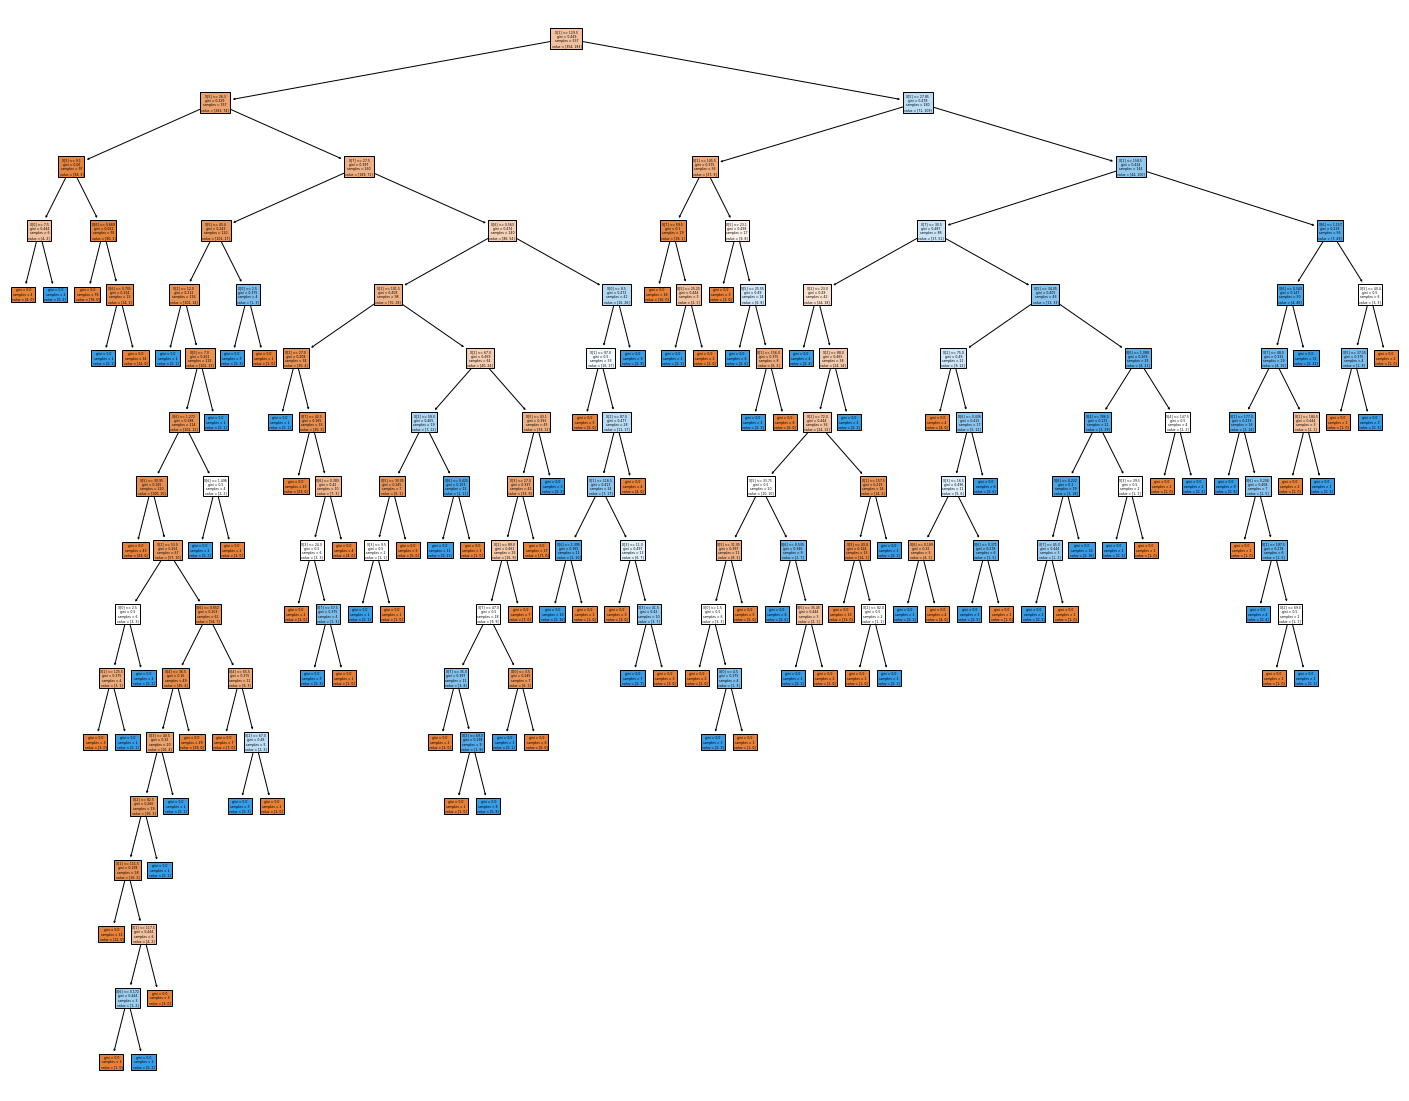

In [8]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)

#### Decision Tree with pruning

In [9]:
# Create Decision Tree Classifier
clf_p = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf_p = clf_p.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_p = clf_p.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_p))

Accuracy: 0.7705627705627706


[Text(0.5, 0.875, 'X[1] <= 127.5\nentropy = 0.926\nsamples = 537\nvalue = [354, 183]'),
 Text(0.25, 0.625, 'X[5] <= 26.45\nentropy = 0.72\nsamples = 342\nvalue = [274, 68]'),
 Text(0.125, 0.375, 'X[5] <= 9.1\nentropy = 0.201\nsamples = 96\nvalue = [93, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.088\nsamples = 90\nvalue = [89, 1]'),
 Text(0.375, 0.375, 'X[7] <= 27.5\nentropy = 0.833\nsamples = 246\nvalue = [181, 65]'),
 Text(0.3125, 0.125, 'entropy = 0.544\nsamples = 112\nvalue = [98, 14]'),
 Text(0.4375, 0.125, 'entropy = 0.958\nsamples = 134\nvalue = [83, 51]'),
 Text(0.75, 0.625, 'X[5] <= 28.15\nentropy = 0.977\nsamples = 195\nvalue = [80, 115]'),
 Text(0.625, 0.375, 'X[1] <= 145.5\nentropy = 0.82\nsamples = 43\nvalue = [32, 11]'),
 Text(0.5625, 0.125, 'entropy = 0.402\nsamples = 25\nvalue = [23, 2]'),
 Text(0.6875, 0.125, 'entropy = 1.0\nsamples = 18\nvalue = [9, 9]'),
 Text(0.875, 0.375, 'X[1] <= 158.5\nentropy = 0.

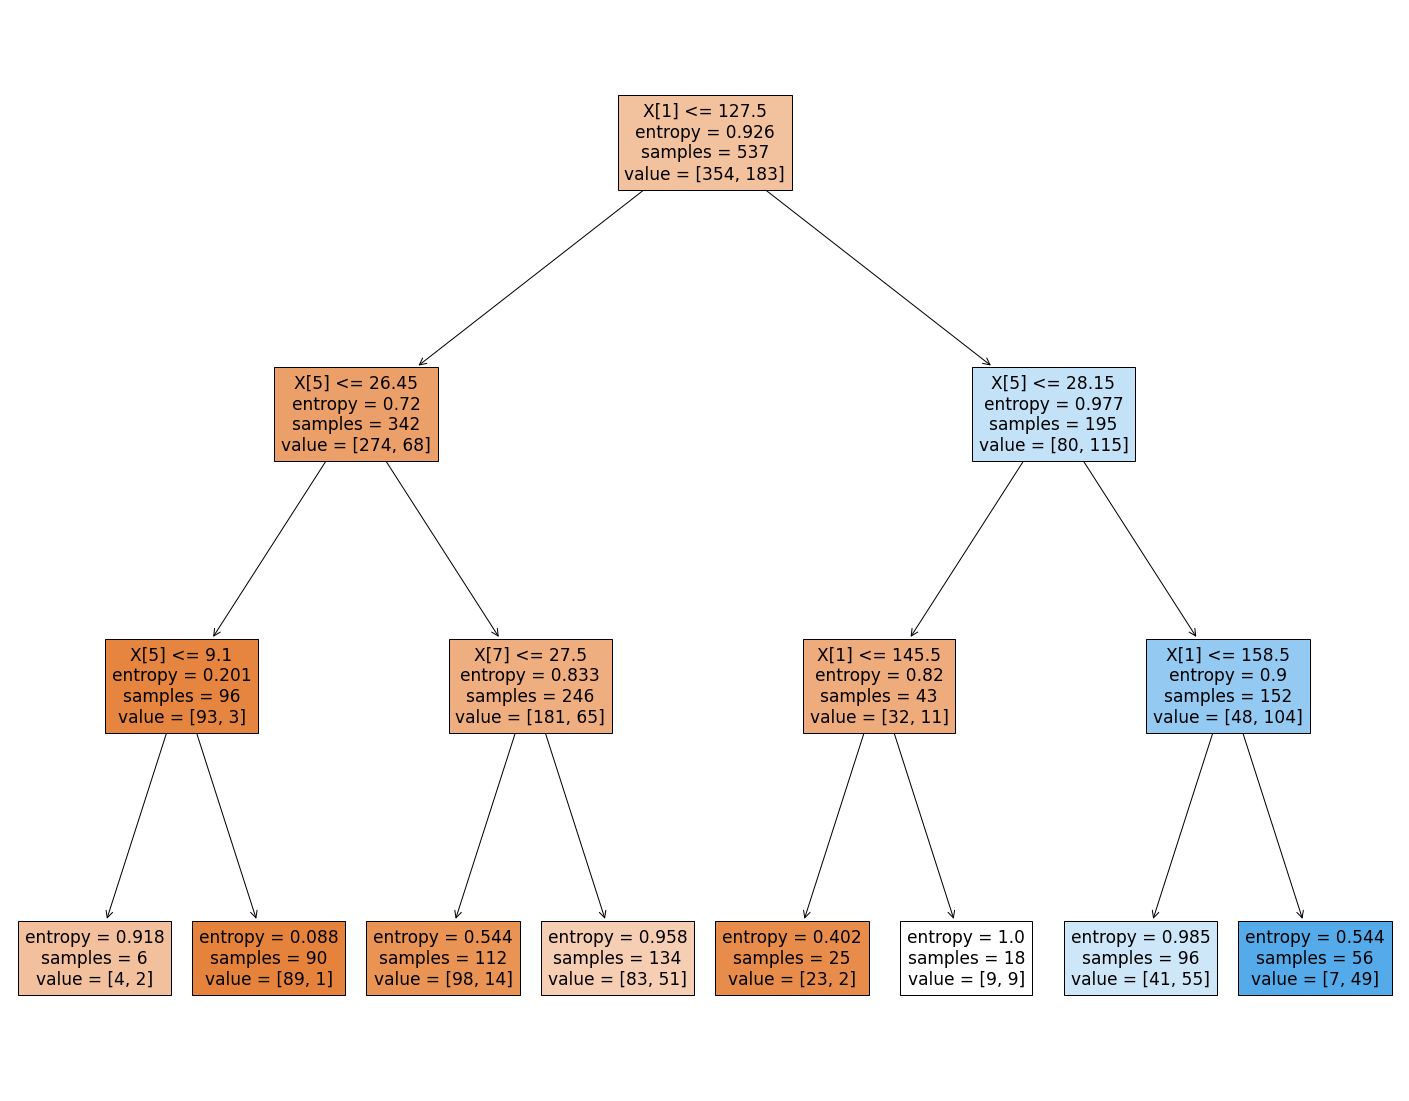

In [10]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_p, filled=True)

#### Menggunakan random forest tanpa pruning

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree Classifier object
rf = RandomForestClassifier()

# Train Decision Tree Classifier
rf = rf.fit(X_train, y_train)

# Predict the respone for test dataset
y_pred_rf = rf.predict(X_test)

In [12]:
#hasil akurasi random forest tanpa pruning

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8051948051948052


#### Menampilkan gambaran dari random forest tanpa pruning

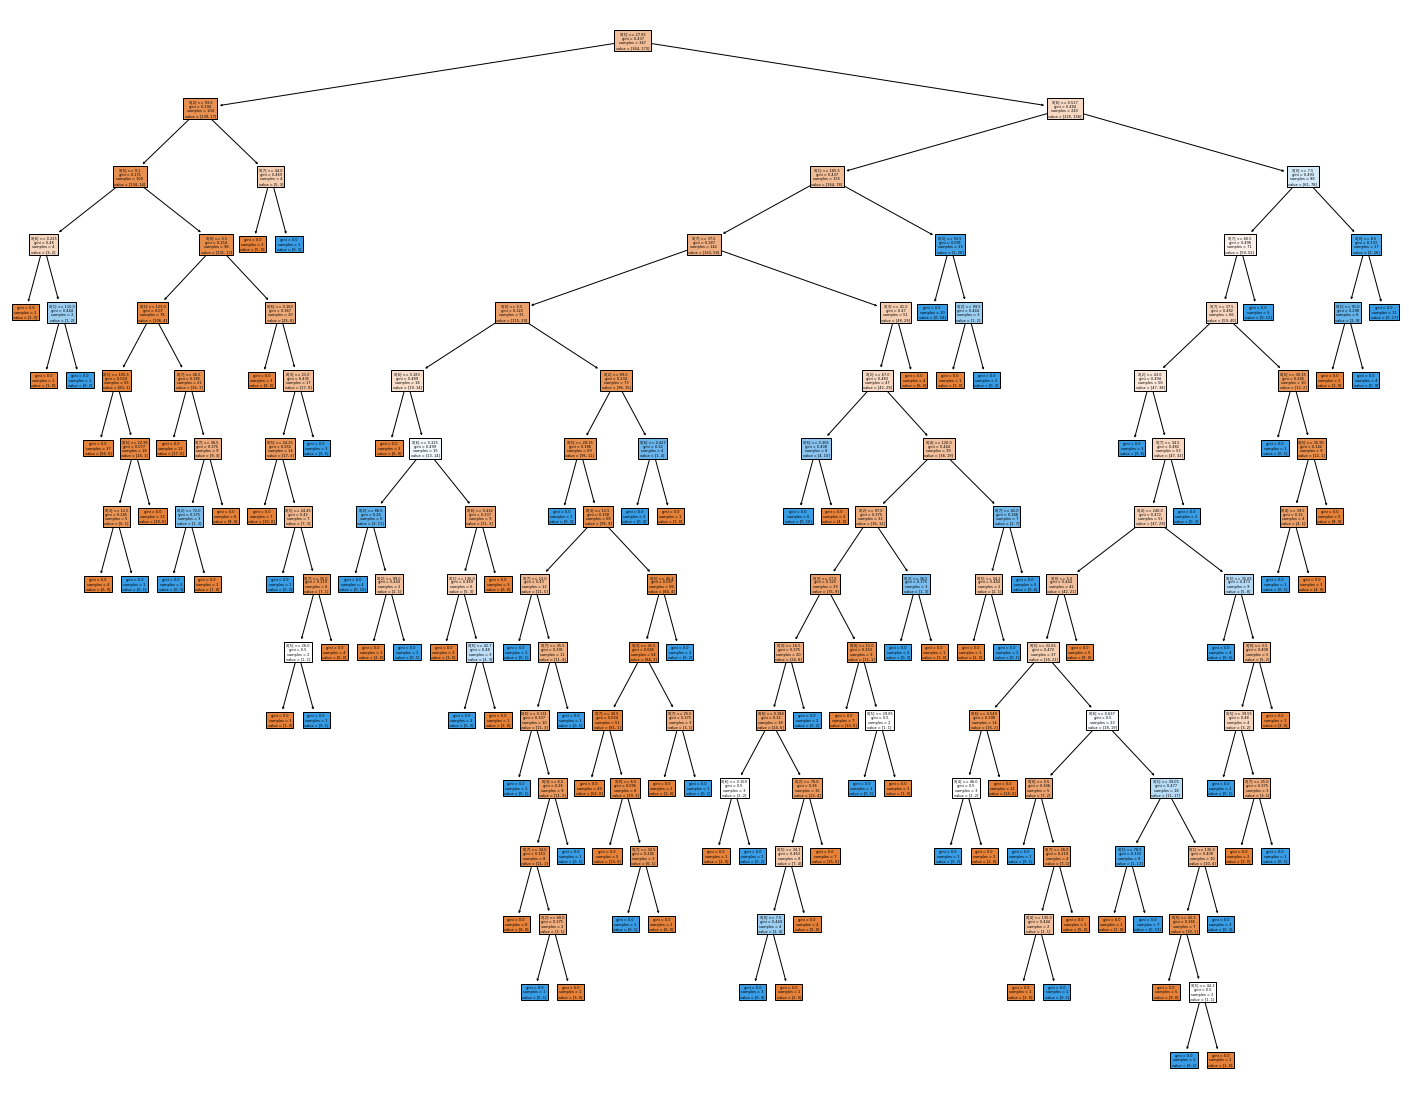

In [13]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf.estimators_[0], filled = True);

#### Random Forest menggunakan pruning

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree classifier object
rf_p = RandomForestClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=5, class_weight=None)

# Train Decision Tree Classifier
rf_p = rf_p.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_rfp = rf_p.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rfp))

Accuracy: 0.7792207792207793


#### Menampilkan gambaran dari Random Forest dengan pruning

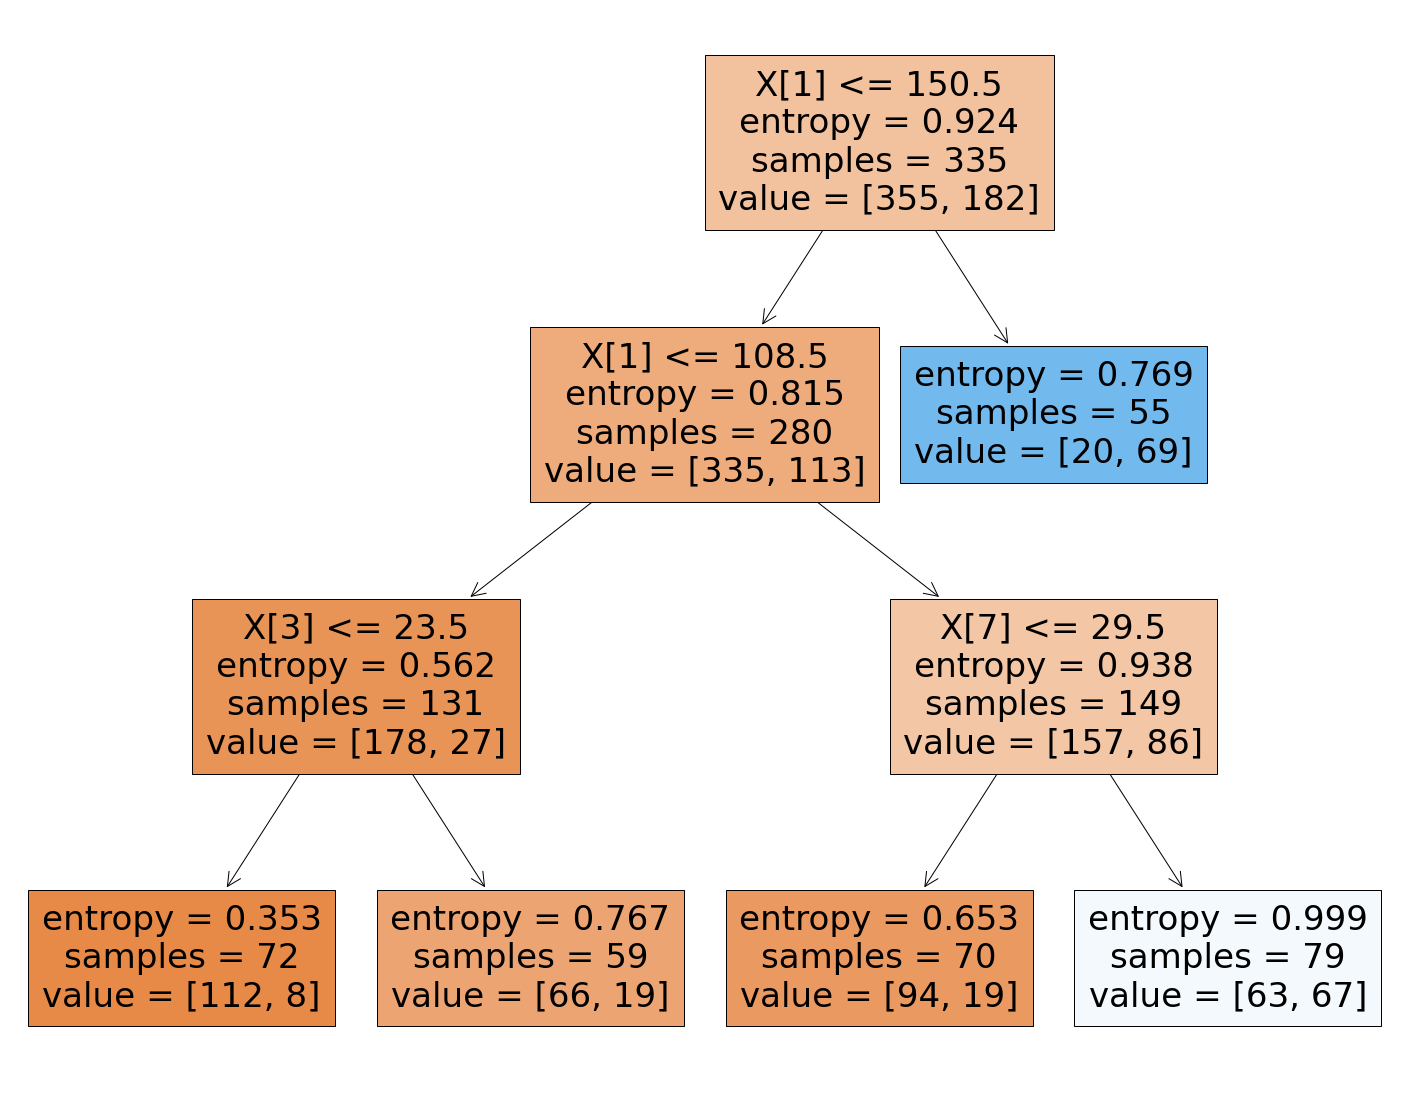

In [15]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf_p.estimators_[0], filled = True);

### Feature Importance
#### Feature Importance merupakan salah satu cara tuning Random Forest dengan menentukan variable penting yang mempengaruhi hasil klasifikasi pada Random Forest.

#### Menggunakan feature importance

Feature: 0, Score: 0.07742
Feature: 1, Score: 0.24498
Feature: 2, Score: 0.09707
Feature: 3, Score: 0.07120
Feature: 4, Score: 0.07192
Feature: 5, Score: 0.17382
Feature: 6, Score: 0.13196
Feature: 7, Score: 0.13162


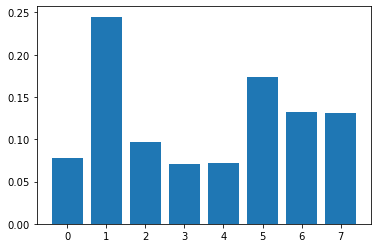

In [16]:
importance = rf.feature_importances_

for i,v in enumerate(importance):
    print("Feature: %0d, Score: %.5f" % (i,v))
    
# menampilkan plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [17]:
#split dataset in features and target variable
importance_cols = ['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']
X1 = dataset[importance_cols] # Features
y1 = dataset['Outcome'] # Target variable

# split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

#### Hasil akurasi setelah menggunakan feature importance

In [18]:
# Create Decision Tree classifier object
rf1 = RandomForestClassifier()

# Train Decision Tree Classifier
rf1 = rf1.fit(X1_train, y1_train)

# Predict the response for test dataset
y1_pred = rf1.predict(X1_test)

print("Accuracy:", metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.7965367965367965


#### Perhatikan, apakah hasil akurasi dengan Random Forest sebelum dan sesudah menggunakan feature importance mengalami kenaikan atau penurunan?

#### Hasilnya akurasinya naik

In [19]:
!jupyter nbconvert --to html "./00000054804_Christopher Darren_Week10.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./00000054804_Christopher Darren_Week10.ipynb to html
[NbConvertApp] Writing 1619179 bytes to 00000054804_Christopher Darren_Week10.html
